# Loan Default Prediction - Part 13 - Support Vector Machines

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 13 of the project: Support Vector Machines.

In this part, I will be trying yet another type of machine learning models, Support Vector Machines.

I will first load the data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils

In [2]:
# Load the training data (imputed but not normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f1_0 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


## SVM (Vanilla Version)

I use the default settings of [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to train the first SVM model. By default, it uses the __RBF__ kernel, which is very powerful to fit the training data but also prone to overfitting.

In [3]:
from sklearn import svm

In [4]:
# Train the first model
# (Did not complete running)

#clf = svm.SVC()
#fit_time = utils.train_model(clf, X_train, y_train)
#acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

SVM's running time complexity is linear or quadratic in terms of the number of examples (depends on the solver), and I have over 100,000 examples in my dataset. The last step took overnight and still could not finish running. I will downsample the dataset to make the experiments more tractable. 

In [5]:
# Downsample the DataFrame

seed = 0 # Provide the seed so the random sampling will be the same
downsample_frac = 0.05
df_downsampled = df.sample(frac=downsample_frac, random_state=seed)
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 43476 to 60051
Columns: 1789 entries, f1_0 to loss
dtypes: float64(1789)
memory usage: 72.0 MB


In [6]:
# Separate data and label, training and validation sets

X = df_downsampled.drop(['loss'], axis=1) # Features
y = (df_downsampled.loc[:,'loss'] > 0) # Labels
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

Time elapsed (Training): 134.0922 s
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 0.000000
PRAUC Score (Training): 0.500000
Accuracy (Validation): 0.892891
ROCAUC Score (Validation): 0.500000
PRAUC Score (Validation): 0.446445
Time elapsed (Evaluation): 73.6525 s


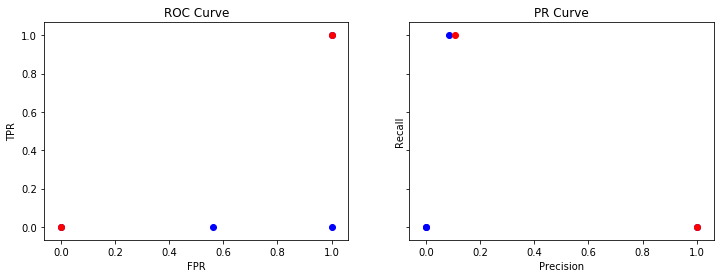

In [7]:
# Train and evaluate the model again

clf = svm.SVC(probability=True) # Set probability=True to enable the predict_proba() API
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

It scores perfectly on the training data. However, ROCAUC of the validation set is 0.5, which means it's not better than random guessing.

## Class Weights

In [8]:
class_weight = {0: 1., 1: 10.}

Time elapsed (Training): 151.1028 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 0.000000
PRAUC Score (Training): 0.500000
Accuracy (Validation): 0.892891
ROCAUC Score (Validation): 0.500000
PRAUC Score (Validation): 0.446445
Time elapsed (Evaluation): 73.8285 s


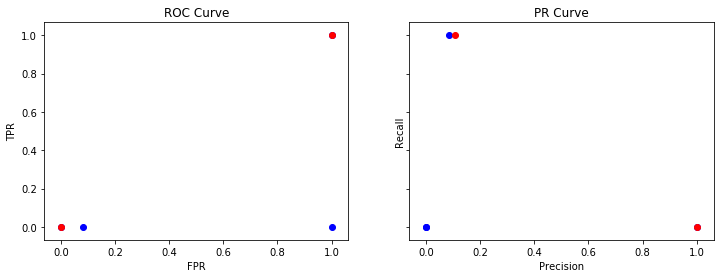

In [9]:
clf = svm.SVC(probability=True, class_weight=class_weight) # Set probability=True to enable the predict_proba() API
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

With class weights, the results are the same.

## Normalized Data

I'll train the model on the normalized data to see if there is any difference.

In [10]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

# Downsample with the same random seed
df_downsampled = df.sample(frac=downsample_frac, random_state=seed)
df_downsampled.info()

# Separate data and label, training and validation sets
X = df_downsampled.drop(['loss'], axis=1) # Features
y = (df_downsampled.loc[:,'loss'] > 0) # Labels
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 43476 to 60051
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 72.0 MB


Time elapsed (Training): 62.5231 s
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913487
ROCAUC Score (Training): 0.987210
PRAUC Score (Training): 0.833404
Accuracy (Validation): 0.892891
ROCAUC Score (Validation): 0.598125
PRAUC Score (Validation): 0.051852
Time elapsed (Evaluation): 27.2283 s


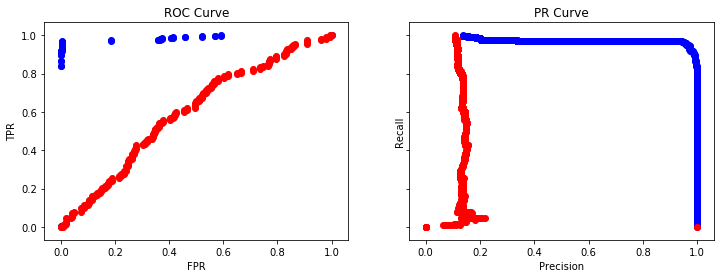

In [11]:
# Train and evaluate the model

clf = svm.SVC(probability=True)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

The training set doesn't get a perfect score anymore, and the validation set now has a ROCAUC of 0.598, indicating better performance on the normalized data set.

Time elapsed (Training): 107.0588 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.820337
ROCAUC Score (Training): 0.941750
PRAUC Score (Training): 0.570817
Accuracy (Validation): 0.709953
ROCAUC Score (Validation): 0.631231
PRAUC Score (Validation): 0.065766
Time elapsed (Evaluation): 50.0370 s


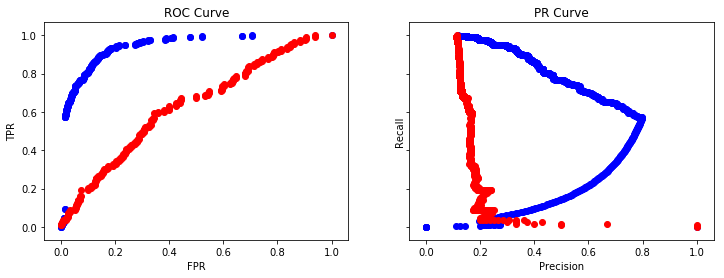

In [12]:
# Adding class weights and then train and evaluate the model

class_weight = {0: 1., 1: 10.}
clf = svm.SVC(probability=True, class_weight=class_weight) # Set probability=True to enable the predict_proba() API
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Adding class weights helped improve the ROCAUC to 0.63.

## RBF Kernel, Gamma

The RBF kernel is the default kernel in this API. The hyperparameter gamma is the inverse of the support vector influence radius. Its default value is 1/(n_features). I will try a set of gammas to see the effects.

In [13]:
# Define a set of values to try

ks = [1e-5, 2e-5, 5e-5, 1e-4, 2e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1]

----- gamma = 0.000010 -----
Time elapsed (Training): 130.5900 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.645888
ROCAUC Score (Training): 0.675460
PRAUC Score (Training): 0.148459
Accuracy (Validation): 0.629384
ROCAUC Score (Validation): 0.632405
PRAUC Score (Validation): 0.055922
Time elapsed (Evaluation): 58.6403 s


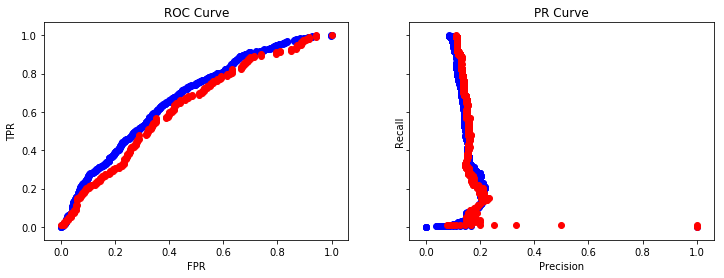

----- gamma = 0.000020 -----
Time elapsed (Training): 128.3940 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.652998
ROCAUC Score (Training): 0.693877
PRAUC Score (Training): 0.125831
Accuracy (Validation): 0.625592
ROCAUC Score (Validation): 0.635214
PRAUC Score (Validation): 0.117010
Time elapsed (Evaluation): 58.1884 s


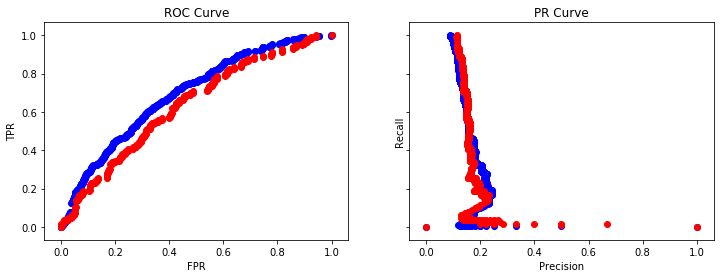

----- gamma = 0.000050 -----
Time elapsed (Training): 124.6922 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.655606
ROCAUC Score (Training): 0.731039
PRAUC Score (Training): 0.116717
Accuracy (Validation): 0.625592
ROCAUC Score (Validation): 0.643181
PRAUC Score (Validation): 0.122435
Time elapsed (Evaluation): 55.2454 s


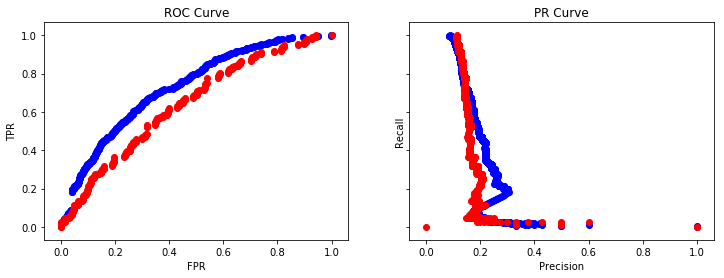

----- gamma = 0.000100 -----
Time elapsed (Training): 120.9474 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.673145
ROCAUC Score (Training): 0.771076
PRAUC Score (Training): 0.160897
Accuracy (Validation): 0.618009
ROCAUC Score (Validation): 0.645031
PRAUC Score (Validation): 0.125525
Time elapsed (Evaluation): 55.1374 s


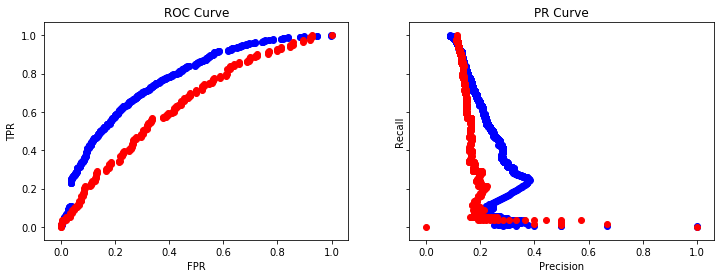

----- gamma = 0.000200 -----
Time elapsed (Training): 118.6202 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0002, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.713913
ROCAUC Score (Training): 0.828201
PRAUC Score (Training): 0.374464
Accuracy (Validation): 0.648341
ROCAUC Score (Validation): 0.642579
PRAUC Score (Validation): 0.124651
Time elapsed (Evaluation): 53.1950 s


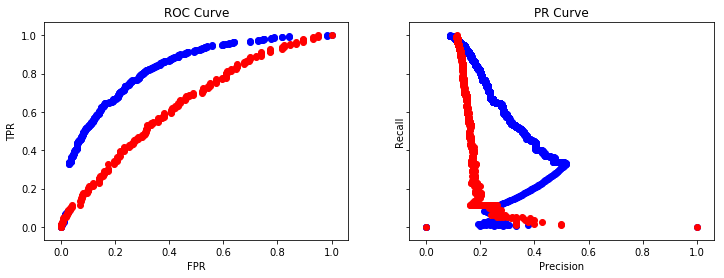

----- gamma = 0.000500 -----
Time elapsed (Training): 109.2891 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.804930
ROCAUC Score (Training): 0.929716
PRAUC Score (Training): 0.588494
Accuracy (Validation): 0.693839
ROCAUC Score (Validation): 0.632884
PRAUC Score (Validation): 0.068812
Time elapsed (Evaluation): 50.0630 s


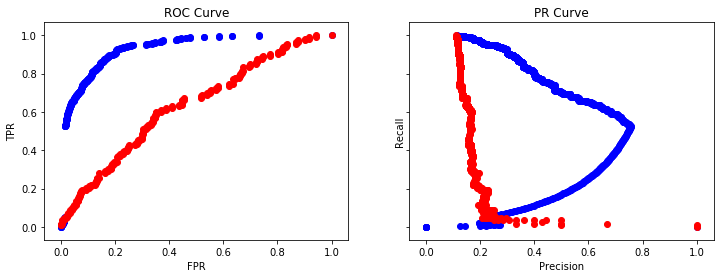

----- gamma = 0.001000 -----
Time elapsed (Training): 99.1844 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.901398
ROCAUC Score (Training): 0.988602
PRAUC Score (Training): 0.612311
Accuracy (Validation): 0.771564
ROCAUC Score (Validation): 0.621245
PRAUC Score (Validation): 0.051389
Time elapsed (Evaluation): 45.8604 s


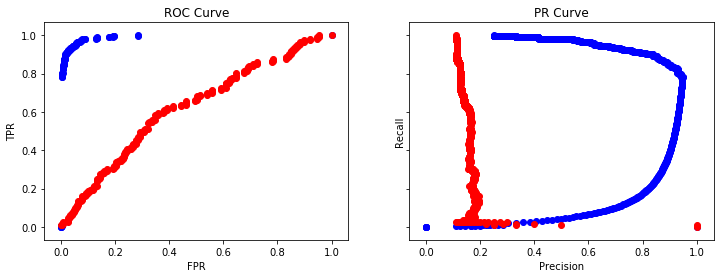

----- gamma = 0.005000 -----
Time elapsed (Training): 137.7111 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.588580
PRAUC Score (Validation): 0.104336
Time elapsed (Evaluation): 55.8652 s


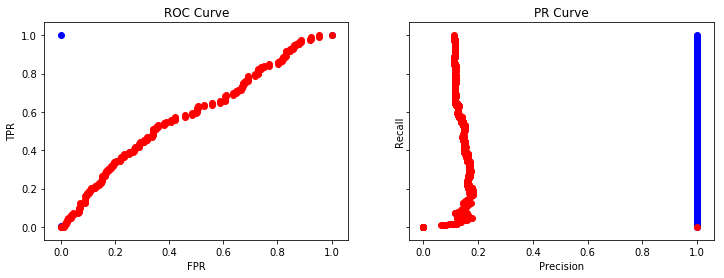

----- gamma = 0.010000 -----
Time elapsed (Training): 145.6935 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.892891
ROCAUC Score (Validation): 0.601657
PRAUC Score (Validation): 0.063855
Time elapsed (Evaluation): 69.1360 s


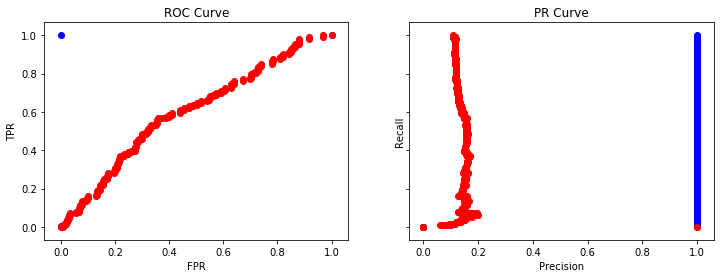

----- gamma = 0.050000 -----
Time elapsed (Training): 145.7985 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 0.000000
PRAUC Score (Training): 0.500000
Accuracy (Validation): 0.892891
ROCAUC Score (Validation): 0.430397
PRAUC Score (Validation): 0.453422
Time elapsed (Evaluation): 67.0726 s


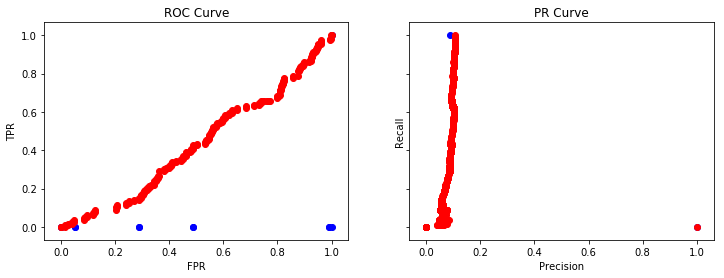

----- gamma = 0.100000 -----
Time elapsed (Training): 150.1231 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 0.000000
PRAUC Score (Training): 0.500000
Accuracy (Validation): 0.892891
ROCAUC Score (Validation): 0.439058
PRAUC Score (Validation): 0.453550
Time elapsed (Evaluation): 68.9740 s


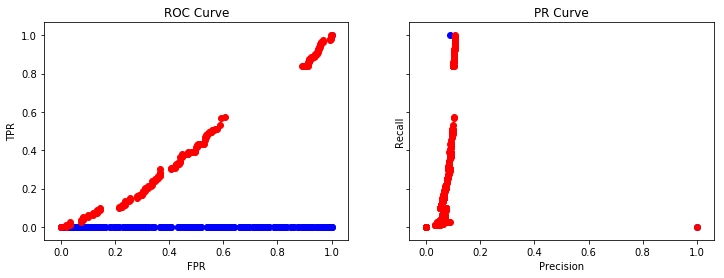

In [14]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- gamma = %f -----' % k)
    clf = svm.SVC(probability=True, class_weight=class_weight, gamma=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

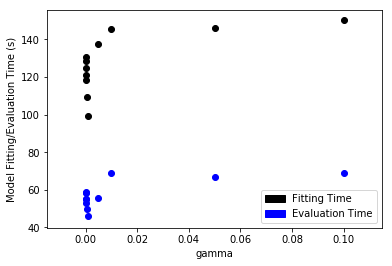

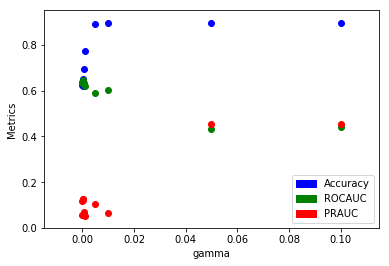

    0_gamma  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0   0.00001    0.629384  0.632405  0.055922  130.590033    58.640299
1   0.00002    0.625592  0.635214  0.117010  128.394038    58.188444
2   0.00005    0.625592  0.643181  0.122435  124.692234    55.245382
3   0.00010    0.618009  0.645031  0.125525  120.947429    55.137420
4   0.00020    0.648341  0.642579  0.124651  118.620184    53.195024
5   0.00050    0.693839  0.632884  0.068812  109.289130    50.063032
6   0.00100    0.771564  0.621245  0.051389   99.184371    45.860374
7   0.00500    0.891943  0.588580  0.104336  137.711068    55.865185
8   0.01000    0.892891  0.601657  0.063855  145.693537    69.135952
9   0.05000    0.892891  0.430397  0.453422  145.798515    67.072598
10  0.10000    0.892891  0.439058  0.453550  150.123112    68.974006


         0_gamma  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  11.000000   11.000000  11.000000  11.000000   11.000000    11.000000
mean    0.015171  

In [15]:
utils.plot_metrics(ks, 'gamma', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best ROCAUC I obtained is 0.645 with gamma=0.0001.